**Code for reproducing the results for the paper titled "Sensitivity analysis of physical and mental health factors affecting Polycystic ovary syndrome in women"**

https://onlinelibrary.wiley.com/doi/10.1111/exsy.13413

Authors: Srirupa Guha, Ashwini Kodipalli

First published date: 26th July 2023



Execute the below cells in Google Colab or any iPython platform like Jupyter Notebook or JupyterLab for reproducing the results from the paper on the given dataset for mental health factors

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
mental_data = pd.read_csv('mentaldata.csv', index_col = 0)
physical_data = pd.read_csv('physical.csv', index_col = 0)

In [3]:
physical_data['Categ'].unique()

array(['Normal', 'Mild', 'Moderate', 'High'], dtype=object)

In [4]:
mental_data['Categ'].unique()

array(['High', 'Normal', 'Mild', 'Moderate'], dtype=object)

In [5]:
mental_data.columns

Index(['Tired for no reason', 'Nervous', 'Cant be calm', 'Hopeless',
       'Restless', 'Cant sit still', 'Depressed', 'Everything is an effort',
       'Sad and cant cheer up', 'Worthless', 'Fear evaluation',
       'Fear humiliation or embarassment', 'Extremely selfconscious',
       'Blushing and sweating', 'Avoid social situations',
       'Worry about appearance', 'Dissatisfaction with body',
       'Avoid certain clothes', 'Compare appearance and feel low',
       'Interfere with activities', 'Categ'],
      dtype='object')

In [6]:
mental_data.head()

,Tired for no reason,Nervous,Cant be calm,Hopeless,Restless,Cant sit still,Depressed,Everything is an effort,Sad and cant cheer up,Worthless,...,Fear humiliation or embarassment,Extremely selfconscious,Blushing and sweating,Avoid social situations,Worry about appearance,Dissatisfaction with body,Avoid certain clothes,Compare appearance and feel low,Interfere with activities,Categ
0,4,4,3,4,3,3,3,3,3,3,...,0,0,0,0,1,1,0,0,1,High
1,2,2,2,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,Normal
2,3,4,1,4,1,1,2,2,3,4,...,1,1,1,1,1,1,0,1,0,High
3,2,3,1,4,2,1,2,2,2,3,...,0,0,0,1,0,1,1,0,0,Mild
4,2,1,1,1,1,1,1,2,2,1,...,1,0,0,0,0,0,0,0,0,Normal


In [7]:
physical_data.head()

,Periods regularly,Cycle length,Duration,Flow,Hair growth,Weight gain,Junk food frequency,Eating pattern,Sleep pattern,Diabetes,Hypertension,Categ
0,0,0,0,0,0,0,1,0,0,0,0,Normal
1,0,0,0,0,0,1,1,0,0,1,1,Normal
2,0,0,0,2,0,0,2,0,0,0,0,Normal
3,0,0,0,0,0,1,1,0,1,0,0,Normal
4,0,0,0,0,0,1,1,0,0,1,0,Normal


#### Analysis of mental data - Mental factors affecting PCOS

#### 1. Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the PCOS Dataset.

In [8]:
data = mental_data
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs       Score
9                 Worthless  214.564374
6                 Depressed  175.106847
3                  Hopeless  174.073944
2              Cant be calm  168.063547
8     Sad and cant cheer up  165.426076
5            Cant sit still  133.341029
4                  Restless  111.755016
7   Everything is an effort   89.329461
1                   Nervous   85.172723
10          Fear evaluation   82.917680


#### 2. Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.063798   0.07716455 0.09996973 0.10712217 0.0833072  0.08777992
 0.11090766 0.07183916 0.09483097 0.12569384 0.07758679]


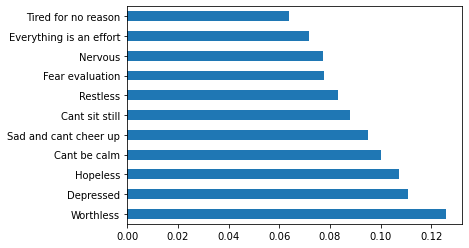

In [ ]:
data = mental_data
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.savefig('Physical_Factors_extra_tree_classifier.png')
plt.show()


#### 3. Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

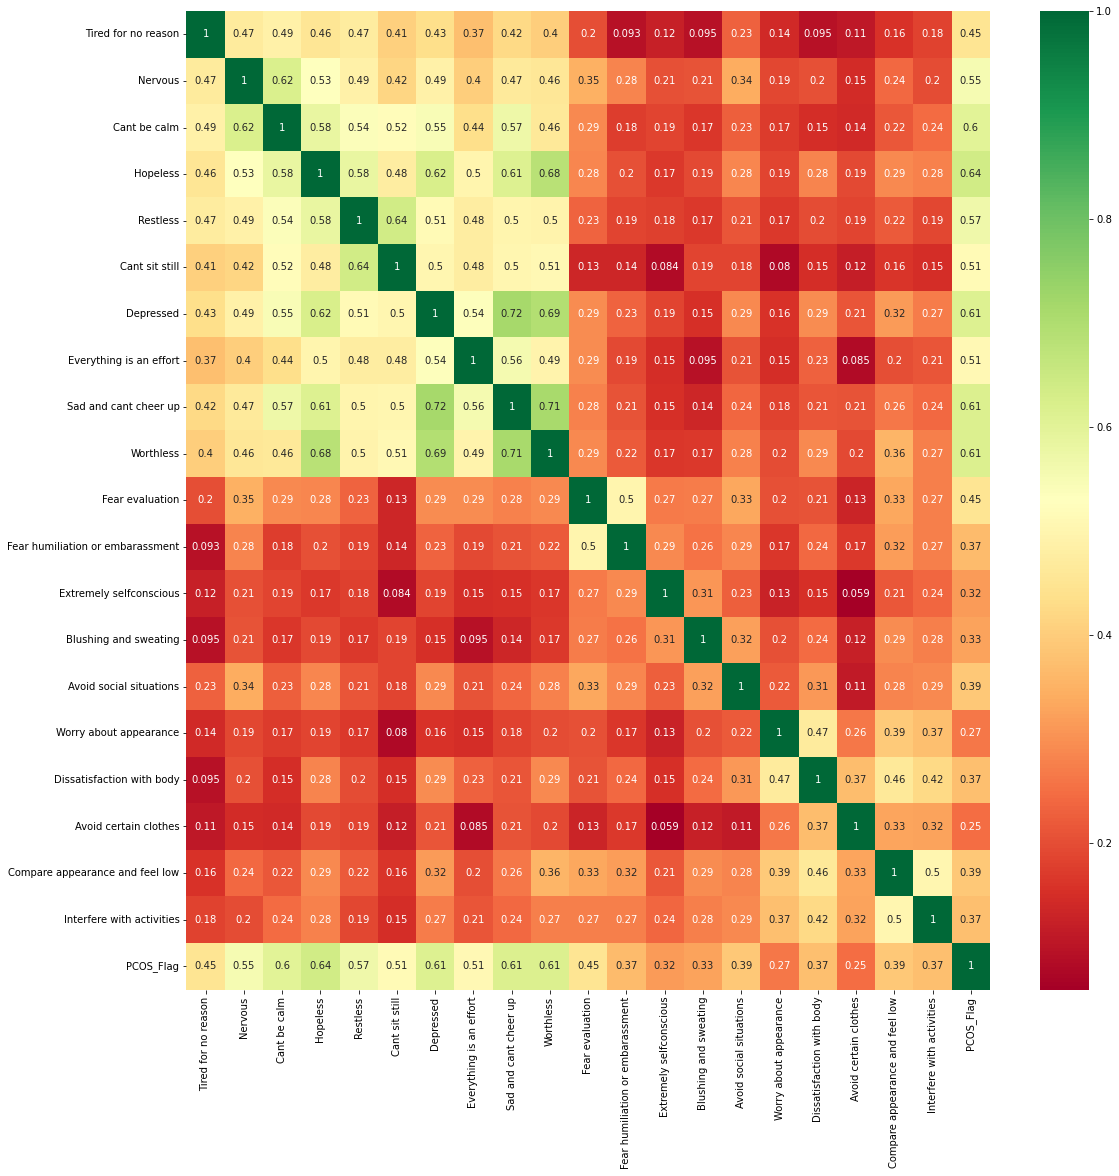

In [ ]:
data = mental_data
data = data.drop('Categ', axis=1)
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,18))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('correlation matrix mental factors.png')

In [17]:
data = mental_data
data['PCOS_Flag'] = np.where(data['Categ'].isin(['High', 'Moderate']), 1, 0)

In [18]:
data

,Tired for no reason,Nervous,Cant be calm,Hopeless,Restless,Cant sit still,Depressed,Everything is an effort,Sad and cant cheer up,Worthless,...,Extremely selfconscious,Blushing and sweating,Avoid social situations,Worry about appearance,Dissatisfaction with body,Avoid certain clothes,Compare appearance and feel low,Interfere with activities,Categ,PCOS_Flag
0,4,4,3,4,3,3,3,3,3,3,...,0,0,0,1,1,0,0,1,High,1
1,2,2,2,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,Normal,0
2,3,4,1,4,1,1,2,2,3,4,...,1,1,1,1,1,0,1,0,High,1
3,2,3,1,4,2,1,2,2,2,3,...,0,0,1,0,1,1,0,0,Mild,0
4,2,1,1,1,1,1,1,2,2,1,...,0,0,0,0,0,0,0,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2,3,4,4,2,4,3,4,3,4,...,0,0,0,0,0,0,0,0,High,1
620,1,1,1,1,1,1,1,3,1,1,...,1,0,0,0,1,0,0,0,Normal,0
621,3,2,3,3,3,3,3,4,2,3,...,1,1,0,0,1,0,0,0,Moderate,1
622,3,3,3,5,4,5,4,3,4,5,...,0,0,0,0,0,0,0,0,High,1


In [19]:
data.columns

Index(['Tired for no reason', 'Nervous', 'Cant be calm', 'Hopeless',
       'Restless', 'Cant sit still', 'Depressed', 'Everything is an effort',
       'Sad and cant cheer up', 'Worthless', 'Fear evaluation',
       'Fear humiliation or embarassment', 'Extremely selfconscious',
       'Blushing and sweating', 'Avoid social situations',
       'Worry about appearance', 'Dissatisfaction with body',
       'Avoid certain clothes', 'Compare appearance and feel low',
       'Interfere with activities', 'Categ', 'PCOS_Flag'],
      dtype='object')

In [20]:
Xtrain = data.iloc[:,0:20]  #independent columns
ytrain = data.iloc[:,-1]

# building the model and fitting the data
log_reg = sm.Logit(np.asarray(ytrain), np.asarray(Xtrain)).fit()

Optimization terminated successfully.
         Current function value: 0.483993
         Iterations 7


In [22]:
Xtrain

,Tired for no reason,Nervous,Cant be calm,Hopeless,Restless,Cant sit still,Depressed,Everything is an effort,Sad and cant cheer up,Worthless,Fear evaluation,Fear humiliation or embarassment,Extremely selfconscious,Blushing and sweating,Avoid social situations,Worry about appearance,Dissatisfaction with body,Avoid certain clothes,Compare appearance and feel low,Interfere with activities
0,4,4,3,4,3,3,3,3,3,3,0,0,0,0,0,1,1,0,0,1
1,2,2,2,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1
2,3,4,1,4,1,1,2,2,3,4,1,1,1,1,1,1,1,0,1,0
3,2,3,1,4,2,1,2,2,2,3,0,0,0,0,1,0,1,1,0,0
4,2,1,1,1,1,1,1,2,2,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2,3,4,4,2,4,3,4,3,4,0,0,0,0,0,0,0,0,0,0
620,1,1,1,1,1,1,1,3,1,1,0,0,1,0,0,0,1,0,0,0
621,3,2,3,3,3,3,3,4,2,3,1,1,1,1,0,0,1,0,0,0
622,3,3,3,5,4,5,4,3,4,5,0,0,0,0,0,0,0,0,0,0


In [23]:
ytrain

,PCOS_Flag
0,1
1,0
2,1
3,0
4,0
...,...
619,1
620,0
621,1
622,1


In [24]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  624
Model:                          Logit   Df Residuals:                      604
Method:                           MLE   Df Model:                           19
Date:                Sat, 22 Feb 2025   Pseudo R-squ.:                  0.3009
Time:                        08:36:13   Log-Likelihood:                -302.01
converged:                       True   LL-Null:                       -431.98
Covariance Type:            nonrobust   LLR p-value:                 2.985e-44
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5838      0.127     -4.585      0.000      -0.833      -0.334
x2            -0.6986      0.142     -4.934      0.000      -0.976      -0.421
x3             0.6644      0.129      5.133      0.000       0.411       0.918
x4             0.2897      0.131      2.213      0.027       0.033       0.546
x5             0.0131      0.137      0.095      0.924      -0.256       0.283
x6             0.2229      0.127      1.754      0.079      -0.026       0.472
x7             0.0928      0.138      0.674      0.500      -0.177       0.363
x8            -0.4510      0.122     -3.706      0.000      -0.689      -0.212
x9             0.2257      0.140      1.611      0.107      -0.049       0.500
x10            0.2632      0.130      2.020      0.043       0.008       0.519
x11            1.0239      0.252      4.061      0.000       0.530       1.518
x12           -0.0350      0.236     -0.148      0.882      -0.499       0.428
x13            0.0940      0.214      0.438      0.661      -0.326       0.514
x14            0.3821      0.267      1.434      0.152      -0.140       0.904
x15            0.9032      0.252      3.583      0.000       0.409       1.397
x16           -0.4539      0.238     -1.905      0.057      -0.921       0.013
x17            0.5921      0.258      2.299      0.022       0.087       1.097
x18           -0.3951      0.225     -1.757      0.079      -0.836       0.046
x19            0.4946      0.272      1.818      0.069      -0.039       1.028
x20            0.8753      0.300      2.919      0.004       0.288       1.463
==============================================================================
"""